<a href="https://colab.research.google.com/github/koushik395/TwitterSentimentAnalysis/blob/main/SentimentAnalysisWithTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment Analysis using Twitter API.

### Install Tweepy package to connect with the Twitter API. 

In [74]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Install the TextBlob package to perform the sentiment analysis.

In [75]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import the neccessary Modules

In [76]:
import re
import tweepy as tw
from textblob import TextBlob
import pandas as pd

### Import the NLTK toolkit and download the stopwords.

In [77]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Give the neccessary keys and access Tokens to login and perform actions using the twitter api.

**For more information on how to get the keys and access tokens refer the Readme.md file**.

In [78]:
api = "6BTKfO7ssq9XroqgvxEzex47u"
secretapi = "HMWNzLhcaQphXi5249oxdjon7hBxlqtAVNc96qKTIXaI8ZYyk8"
access_token ="1508746915361423362-P3U4DpvxJuNlZAonj5zMXMLteBo5mu"
access_token_secret ="uAjokmGo8ieO783bWxBcQE6W1UiWFj9rZswTGTH499tza"

### Connect to the twitter API.

In [79]:
try:
    # create OAuthHandler object
    auth = tw.OAuthHandler(api, secretapi)
    # set access token and secret
    auth.set_access_token(access_token, access_token_secret)
    # create tweepy API object to fetch tweets
    api = tw.API(auth)
    print("Authentication Successfull!!!")
except:
    print("Error: Authentication Failed")

Authentication Successfull!!!


### Retrieve the twitter tweets according to the keyword given.

In [89]:
keyword = 'RRRforOscars'
limit=100
fetched_tweets = tw.Cursor(api.search,q=keyword,count=limit,tweet_mode='extended').items(500)

columns = ['Time','User','Tweet']
data = []
count=0
for tweet in fetched_tweets:
  data.append([tweet.created_at,tweet.user.screen_name,tweet.full_text])

df = pd.DataFrame(data,columns = columns )
df

,Time,User,Tweet
0,2023-01-09 10:31:49,MadhuCharan2731,RT @LaReinaCreole: You are very welcome! #RRRf...
1,2023-01-09 10:30:51,RaghuTiger8,RT @thestaRRR78: Jakkanna @ssrajamouli garu wa...
2,2023-01-09 10:30:40,ACHYUTH85251358,RT @poornachoudary1: Tarak anna about #RRRmovi...
3,2023-01-09 10:30:40,Ramsayyz2,RT @LaReinaCreole: You are very welcome! #RRRf...
4,2023-01-09 10:30:39,Ramu_reddy9999,RT @MaxFromQuebec: No 2022 film has matched th...
...,...,...,...
495,2023-01-09 08:40:06,AlwayzUpendra,RT @Harsh___07__: Konidela Ram Charan Teja..!🤩...
496,2023-01-09 08:40:05,mraghu9493,RT @BorntobeAshwani: NTR @tarak9999 reveals th...
497,2023-01-09 08:39:54,Nanduntr_9999,RT @SimhaNTR4: Twitter Motham Emi elevation is...
498,2023-01-09 08:39:24,SampathAnche,RT @joel_eisenberg: I met S. S. Rajamouli earl...


### Cleaning the Tweets.

In [90]:
def clean_tweet(tweet):
    '''
    Utility function to clean tweet text by removing links, special characters
    using simple regex statements.
    '''
    stop_words = nltk.corpus.stopwords.words('english')
    token=re.sub("RT|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).lower().split()
    filtered_sentence = []
 
    for w in token:
      if w not in stop_words:
        filtered_sentence.append(w)

    text1=" ".join(filtered_sentence)
    return text1

### Function to return the sentiment of a tweet

In [91]:
def get_tweet_sentiment(tweet,parsed_tweet):
    '''
    Function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    parsed_tweet['polarity'] = analysis.sentiment.polarity
    parsed_tweet['subjectivity'] = analysis.sentiment.subjectivity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

### Program to store the cleaned tweet and sentiment into a dictionary.

In [92]:
tweets = []
# parsing tweets one by one
fetched_tweets = tw.Cursor(api.search,q=keyword,count=limit,tweet_mode='extended',lang="en").items(500)
for tweet in fetched_tweets:
  # empty dictionary to store required params of a tweet
  parsed_tweet = {}
 
  # saving text of tweet
  parsed_tweet['cleaned_text'] = clean_tweet(tweet.full_text)
  # saving sentiment of tweet
  parsed_tweet['sentiment'] = get_tweet_sentiment(tweet.full_text,parsed_tweet)
  # appending parsed tweet to tweets list
  if tweet.retweet_count > 0:
    # if tweet has retweets, ensure that it is appended only once
    if parsed_tweet not in tweets:
        tweets.append(parsed_tweet)
  else:
    tweets.append(parsed_tweet)
 
  # return parsed tweets
for i in tweets:
  print(i,"\n")

{'cleaned_text': 'welcome rrrforoscars', 'polarity': 0.8, 'subjectivity': 0.9, 'sentiment': 'positive'} 

{'cleaned_text': 'jakkanna garu wanted hear anna would never complain rrrmovie', 'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'neutral'} 

{'cleaned_text': 'tarak anna rrrmovie interval sequence rrrforoscars manofmassesntr jrntr', 'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'neutral'} 

{'cleaned_text': '2022 film matched sheer grandeur seeing rrr big screen euphoria comes watching', 'polarity': 0.0, 'subjectivity': 0.425, 'sentiment': 'neutral'} 

{'cleaned_text': 'people dance theatre disgusting meanwhile foreign people watching rrr movie rrrmovie', 'polarity': -0.5625, 'subjectivity': 0.5625, 'sentiment': 'negative'} 

{'cleaned_text': 'thrilled response video far diehard rrr fans havent checked yet please take', 'polarity': 0.35, 'subjectivity': 0.85, 'sentiment': 'positive'} 

{'cleaned_text': 'glad see ovation two received ntr jr self effacing graceful man much l

### Finding the percentage of positive,negative and nuetral tweets.

In [93]:
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
# percentage of neutral tweets
print("Print Nuetral Tweets percentage :{} %".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

Positive tweets percentage: 43.75 %
Negative tweets percentage: 6.25 %
Print Nuetral Tweets percentage :50.0 %


In [94]:
df1 = pd.DataFrame.from_dict(tweets)
df1

,cleaned_text,polarity,subjectivity,sentiment
0,welcome rrrforoscars,0.800000,0.900000,positive
1,jakkanna garu wanted hear anna would never com...,0.000000,0.000000,neutral
2,tarak anna rrrmovie interval sequence rrrforos...,0.000000,0.000000,neutral
3,2022 film matched sheer grandeur seeing rrr bi...,0.000000,0.425000,neutral
4,people dance theatre disgusting meanwhile fore...,-0.562500,0.562500,negative
...,...,...,...,...
59,nonenglish language film symposium directors f...,0.000000,0.000000,neutral
60,bheem talking naatunaatu amp interval sequence...,0.357143,0.571429,positive
61,global star thank ramcharan rrrforoscars manof...,0.000000,0.000000,neutral
62,summer hair otherwise also feel cold rahulgand...,-0.600000,1.000000,negative


### Visualization

Text(0, 0.5, 'Frequency')

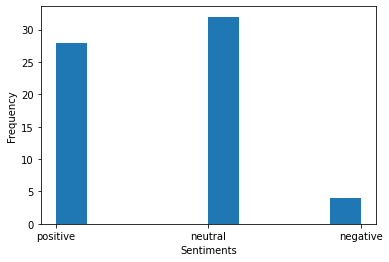

In [95]:
import matplotlib.pyplot as plt
plt.hist(df1['sentiment'])
plt.xlabel('Sentiments')
plt.ylabel('Frequency')

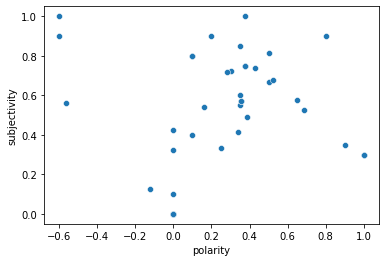

In [96]:
import seaborn as sns
sns.scatterplot(x='polarity',y='subjectivity',data=df1)

In [98]:
df1['sentiment'].value_counts()

neutral     32
positive    28
negative     4
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x7feb4dbce5b0>,
 [Text(-1.1, 1.3471114790620887e-16, 'Nuetral'),
  Text(1.0788638084435533, -0.21459935421774162, 'Positive'),
  Text(0.21459935421774168, 1.0788638084435533, 'Negative')],
 [Text(-0.6, 7.347880794884119e-17, '50.00'),
  Text(0.5884711682419381, -0.11705419320967722, '43.75'),
  Text(0.11705419320967726, 0.5884711682419381, '6.25')])

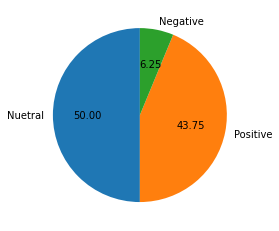

In [99]:
labels = ['Nuetral','Positive','Negative']
plt.pie(df1['sentiment'].value_counts(),labels=labels,startangle=90,autopct='%.2f')